# Gradient Checking



# Adding Previous Model and data

In [51]:
import numpy as np

# load the text file into an array
train_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_x.npy')
test_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_x.npy')
cv_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_x.npy')

train_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_y.npy')
test_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_y.npy')
cv_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_y.npy')


In [54]:
train_set_x=train_set_x.T
test_set_x=test_set_x.T
cv_set_x=cv_set_x.T

In [55]:
from dnn_app_utils_v3 import *

In [56]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0318, num_iterations = 500, print_cost=False):

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [57]:
n_1=13
alpha=0.0742

In [58]:
n_x = train_set_x.shape[0]

layers_dims = [n_x, n_1, 4, 1] #  4-layer model

In [59]:
n_x

784

Cost after iteration 0: 0.698928
Cost after iteration 100: 0.314601
Cost after iteration 200: 0.239916
Cost after iteration 300: 0.204867
Cost after iteration 400: 0.198680


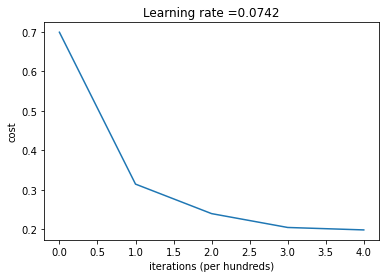

In [60]:
parameters = L_layer_model(train_set_x, train_set_y.reshape(1, -1), 
                           layers_dims, learning_rate = alpha, num_iterations = 500, print_cost = True)

In [61]:
X = train_set_x
Y = train_set_y
parameters

{'W1': array([[ 0.05801814, -0.02184272, -0.01884624, ..., -0.0393493 ,
         -0.01272704,  0.01805987],
        [ 0.04352334, -0.0692825 , -0.02867493, ...,  0.00924281,
         -0.05053973,  0.02246035],
        [ 0.010708  , -0.06630863, -0.07682291, ..., -0.06978404,
          0.00666456, -0.00013208],
        ...,
        [-0.03555798, -0.03887394,  0.00491149, ...,  0.03655969,
          0.00336449,  0.01556405],
        [-0.03213284,  0.06373808, -0.03495924, ..., -0.02092926,
          0.04145557,  0.04727282],
        [-0.01836983, -0.02856281, -0.02922401, ...,  0.0295495 ,
         -0.00157581,  0.05307864]]),
 'b1': array([[ 0.04670582],
        [ 0.23871382],
        [-0.00386305],
        [-0.01307371],
        [ 0.00033851],
        [-0.14553678],
        [-0.11381701],
        [ 0.00173087],
        [-0.00865581],
        [ 0.00383742],
        [ 0.2833257 ],
        [-0.08860476],
        [-0.00422465]]),
 'W2': array([[ 0.10873043,  0.41931652,  0.20151336, -0.305

In [62]:
parameters["W1"].shape

(13, 784)

In [63]:
parameters["W2"].shape

(4, 13)

In [64]:
parameters["W3"].shape

(1, 4)

In [65]:
parameters["b1"].shape

(13, 1)

In [66]:
parameters["b2"].shape

(4, 1)

In [67]:
parameters["b3"].shape

(1, 1)

In [68]:
# Packages
import numpy as np
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

In [69]:
def forward_propagation_n(X, Y, parameters):
   

    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [70]:
def backward_propagation_n(X, Y, cache):

    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) * 2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 4./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [72]:
#take a look
parameters_values, keys = dictionary_to_vector(parameters)
parameters_values.shape

(10266, 1)

In [80]:
13*784+13+4*13+4+4+1

10266

In [81]:
def vector_to_dictionary(theta): 
    parameters = {}
    parameters["W1"] = theta[:10192].reshape((13, 784))
    parameters["b1"] = theta[10192:10205].reshape((13, 1))
    parameters["W2"] = theta[10205:10257].reshape((4, 13))
    parameters["b2"] = theta[10257:10261].reshape((4, 1))
    parameters["W3"] = theta[10261:10265].reshape((1, 4))
    parameters["b3"] = theta[10265:10266].reshape((1,1))

    return parameters

In [84]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):

    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        if i%1000==0:
            print(i,"/",num_parameters)
            
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        thetaplus = np.copy(parameters_values)                                      # Step 1
        thetaplus[i][0] = thetaplus[i] + epsilon                                    # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus)) # Step 3

        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        thetaminus = np.copy(parameters_values)                                       # Step 1
        thetaminus[i][0] = thetaminus[i] - epsilon                                    # Step 2        
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus)) # Step 3                              
        
        
        # Compute gradapprox[i]
        gradapprox[i] = (J_plus[i]-J_minus[i])/(2*epsilon)

    
    # Compare gradapprox to backward propagation gradients by computing difference.
    ### START CODE HERE ### (approx. 1 line)
    numerator = np.linalg.norm(grad-gradapprox)                                     # Step 1'
    denominator = np.linalg.norm(grad)+np.linalg.norm(gradapprox)                  # Step 2'
    difference = numerator /denominator                                           # Step 3'
    ### END CODE HERE ###

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [85]:
#example

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

0 / 10266
1000 / 10266
2000 / 10266
3000 / 10266
4000 / 10266
5000 / 10266
6000 / 10266
7000 / 10266
8000 / 10266
9000 / 10266
10000 / 10266
There is a mistake in the backward propagation! difference = 0.17239973211228973
